# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: The number of features are 18
- **Hidden Layers**: 2 hidden layers
- **Output Layer**: Single neuron with **sigmoid** activation function since it is a binary classification problem

## Training

- **Optimizer**: Adam
- **Loss Function**: Binary cross-entropy
- **Metrics**: Accuracy
- **Epochs**: 100
- **Batch Size**: 32
- **Validation Split**: 20% of the training data

## Evaluation
- **Accuracy**

If you need to change the steps or add more please do so and explain why!

## Preparing
1. Since it is binary classification, we should use:

  **Loss function:** Binary cross entropy.

  **Activation function:** sigmoid.


# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Data and EDA

In [ ]:
! kaggle datasets download -d ahmedgaitani/customer-churn-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset
License(s): CC0-1.0
  0% 0.00/7.58k [00:00<?, ?B/s]
100% 7.58k/7.58k [00:00<00:00, 11.9MB/s]


In [ ]:
! unzip /content/customer-churn-prediction-dataset.zip

Archive:  /content/customer-churn-prediction-dataset.zip
  inflating: customer_churn_prediction_dataset.csv  


In [ ]:
df = pd.read_csv("/content/customer_churn_prediction_dataset.csv")

In [ ]:
df.sample(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
73,0074-XXXX,Female,1,No,Yes,4,Yes,No phone service,No,Yes,...,No internet service,No,Yes,No internet service,Month-to-month,No,Mailed check,54.12,216.48,No
121,0122-XXXX,Male,1,Yes,Yes,13,No,No phone service,Fiber optic,No,...,No,No internet service,Yes,No internet service,Month-to-month,No,Bank transfer,57.55,748.15,Yes
230,0231-XXXX,Female,0,Yes,No,13,No,No,Fiber optic,No internet service,...,No internet service,No internet service,No internet service,No,Month-to-month,No,Mailed check,33.98,441.74,No
226,0227-XXXX,Male,0,Yes,No,23,Yes,No phone service,No,No,...,No,No internet service,No internet service,Yes,One year,No,Electronic check,83.99,1931.77,Yes
280,0281-XXXX,Female,1,Yes,No,71,No,No phone service,No,No,...,Yes,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card,50.94,3616.74,No
217,0218-XXXX,Male,1,Yes,Yes,26,Yes,No phone service,Fiber optic,No internet service,...,No internet service,No internet service,No,No,One year,No,Mailed check,80.61,2095.86,No
55,0056-XXXX,Female,0,Yes,Yes,8,Yes,No phone service,Fiber optic,No,...,No,No,No,No internet service,Month-to-month,No,Credit card,95.08,760.64,No
23,0024-XXXX,Female,1,No,Yes,8,No,Yes,DSL,No,...,No,Yes,No,Yes,Two year,No,Electronic check,92.91,743.28,No
123,0124-XXXX,Male,0,Yes,No,2,Yes,No,Fiber optic,No internet service,...,No internet service,No internet service,No,No internet service,Month-to-month,Yes,Mailed check,40.32,80.64,No
27,0028-XXXX,Female,0,No,No,14,No,No phone service,No,No,...,Yes,No,No,Yes,Two year,No,Bank transfer,55.55,777.70,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [ ]:
df_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn']

for col in df_cols:
  print(df[col].value_counts())
  print("*********")


gender
Male      151
Female    149
Name: count, dtype: int64
*********
SeniorCitizen
1    163
0    137
Name: count, dtype: int64
*********
Partner
Yes    155
No     145
Name: count, dtype: int64
*********
Dependents
Yes    158
No     142
Name: count, dtype: int64
*********
tenure
26    10
5      8
51     8
38     8
40     7
      ..
48     1
19     1
30     1
32     1
65     1
Name: count, Length: 70, dtype: int64
*********
PhoneService
Yes    156
No     144
Name: count, dtype: int64
*********
MultipleLines
No                  105
Yes                 100
No phone service     95
Name: count, dtype: int64
*********
InternetService
Fiber optic    105
No              99
DSL             96
Name: count, dtype: int64
*********
OnlineSecurity
No                     107
Yes                     99
No internet service     94
Name: count, dtype: int64
*********
OnlineBackup
No                     109
Yes                    106
No internet service     85
Name: count, dtype: int64
*********
DevicePr

In [ ]:
df.shape

(300, 21)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Visualization

<Axes: title={'center': 'Churn by gender'}, xlabel='gender', ylabel='count'>

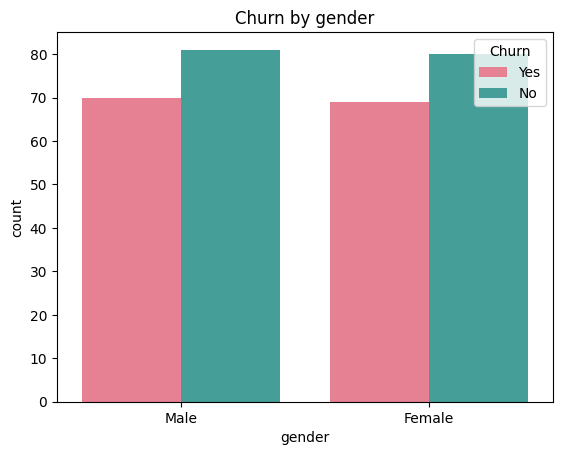

In [ ]:
plt.title("Churn by gender")
sns.countplot(data=df, x="gender", hue="Churn", palette="husl")

<Axes: title={'center': 'Churn by partner'}, xlabel='Partner', ylabel='count'>

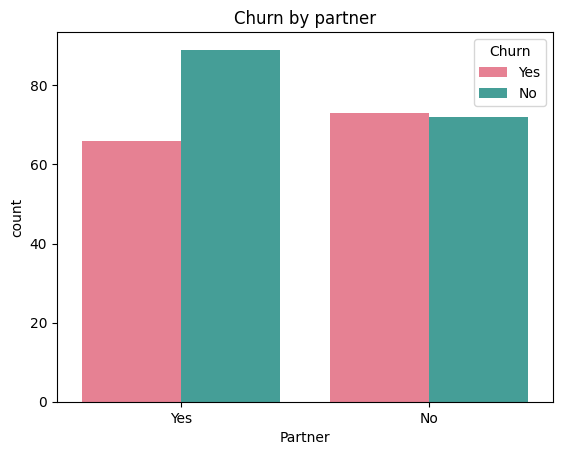

In [ ]:
plt.title("Churn by partner") # TODO [No, Yes]
sns.countplot(data=df, x='Partner', hue="Churn", palette="husl")

<Axes: title={'center': 'Churn by Contract'}, xlabel='Contract', ylabel='count'>

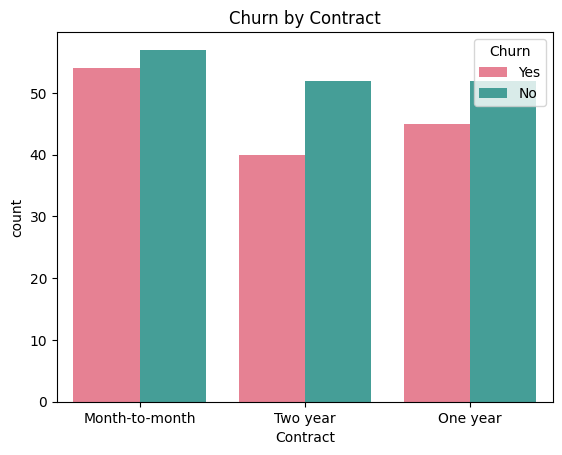

In [ ]:
plt.title("Churn by Contract")
sns.countplot(data=df, x='Contract', hue="Churn", palette="husl")



* **DSL service** Suggests that DSL users are less likely to churn compared to users without internet service or users with fiber optic service.

* **fiber optic service** Customers with fiber optic service are more prone to churn than those with DSL This could be due to various factors such as **cost**, **service quality**, or **customer expectations**.

<Axes: title={'center': 'Churn by InternetService'}, xlabel='InternetService', ylabel='count'>

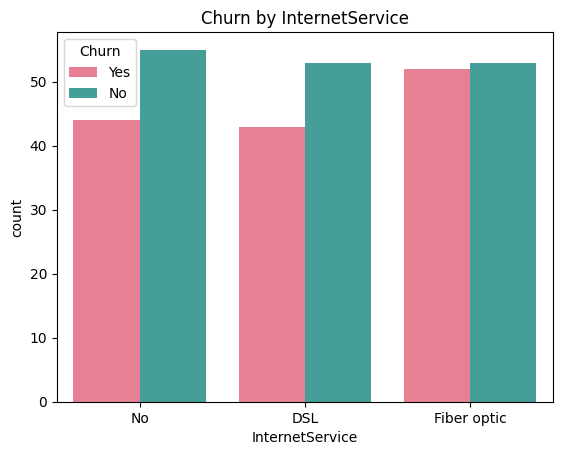

In [ ]:
plt.title("Churn by InternetService")
sns.countplot(data=df,  x='InternetService', hue="Churn", palette="husl")

<Axes: title={'center': 'Churn by PaymentMethod'}, xlabel='PaymentMethod', ylabel='count'>

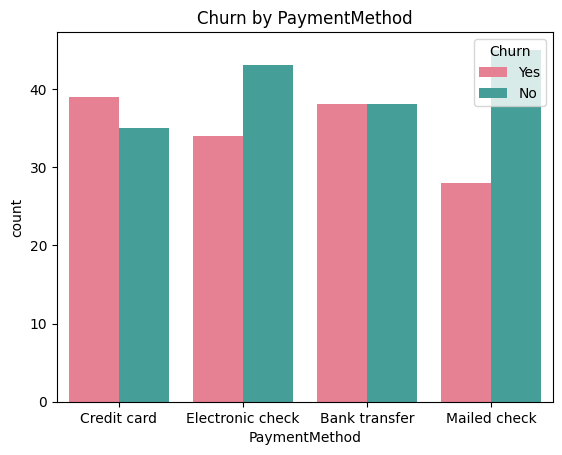

In [ ]:
plt.title("Churn by PaymentMethod")
sns.countplot(data=df,  x='PaymentMethod', hue="Churn", palette="husl")

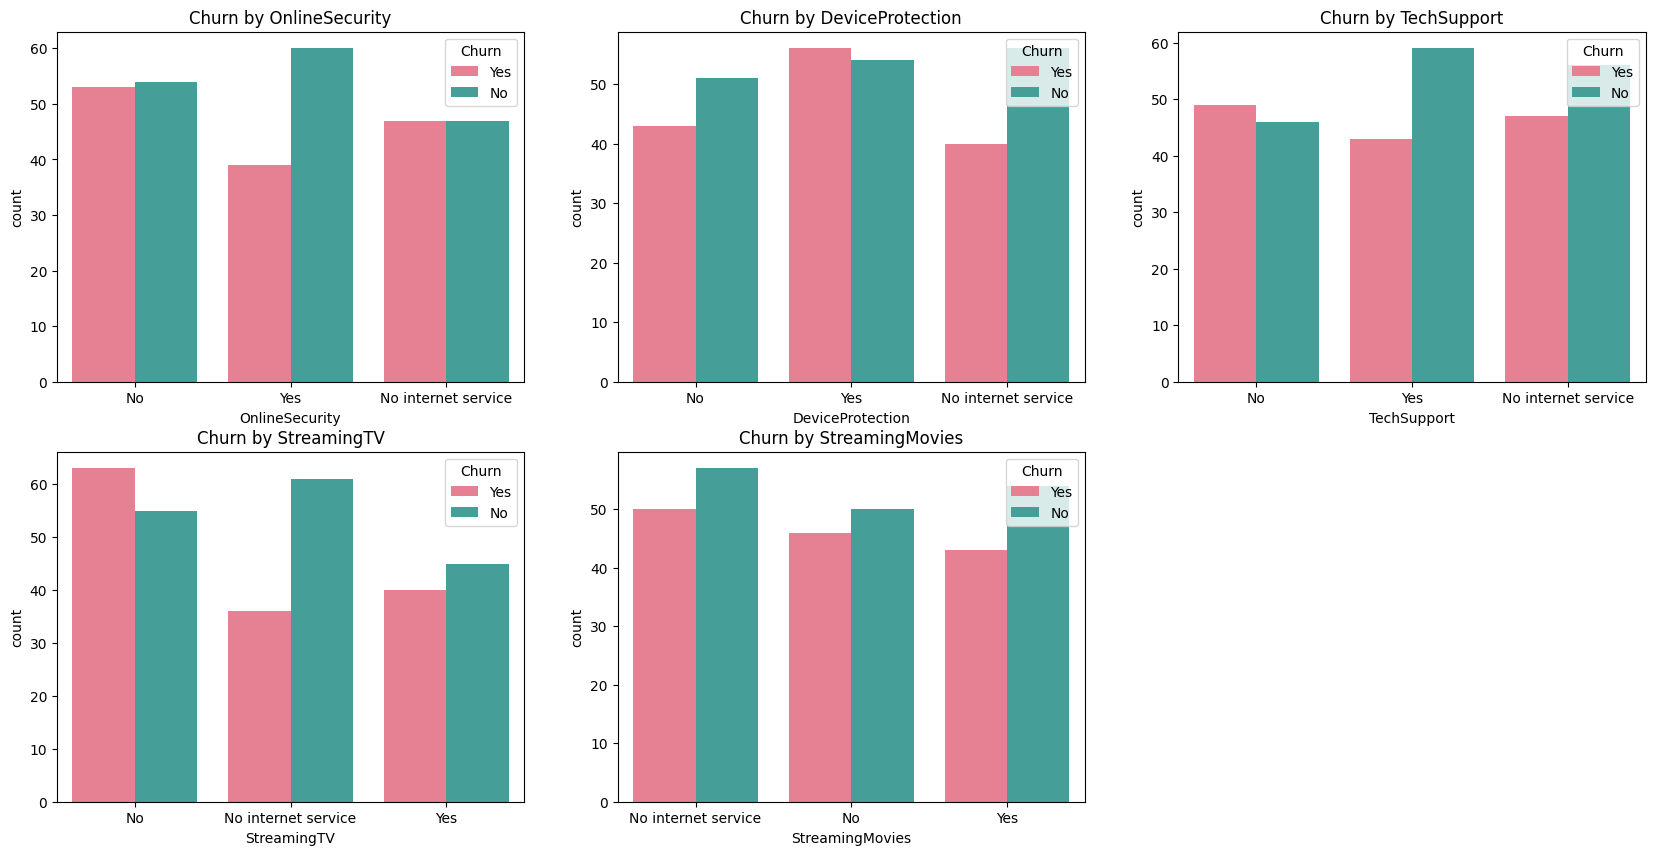

In [ ]:
additional_services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20.5, 10))

for i, service in enumerate(additional_services, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=service, hue='Churn', data=df, palette='husl')
    plt.title(f'Churn by {service}')

plt.show()

<Axes: >

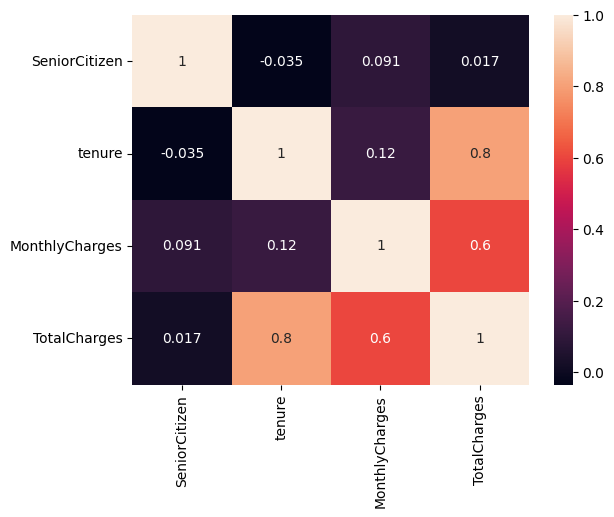

In [ ]:
df_corr = df.select_dtypes(include=["int", "float"]).corr()

sns.heatmap(df_corr, annot=True)

## Preprocessing

### Drop unnecessary columns


* `totalCharges` is the product of `monthlyCharges` and `tenure`. They don't provide new information

> Including highly correlated or redundant features can lead to overfitting and might not improve the model’s performance.





In [ ]:
cols_to_delete = ["customerID", "TotalCharges"]

df = df.drop(columns=cols_to_delete, axis=1)

### One-hot-encoder and Label-encoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            300 non-null    object 
 1   SeniorCitizen     300 non-null    int64  
 2   Partner           300 non-null    object 
 3   Dependents        300 non-null    object 
 4   tenure            300 non-null    int64  
 5   PhoneService      300 non-null    object 
 6   MultipleLines     300 non-null    object 
 7   InternetService   300 non-null    object 
 8   OnlineSecurity    300 non-null    object 
 9   OnlineBackup      300 non-null    object 
 10  DeviceProtection  300 non-null    object 
 11  TechSupport       300 non-null    object 
 12  StreamingTV       300 non-null    object 
 13  StreamingMovies   300 non-null    object 
 14  Contract          300 non-null    object 
 15  PaperlessBilling  300 non-null    object 
 16  PaymentMethod     300 non-null    object 
 1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# InternetService
# Fiber optic, No, DSL


# Contract
# Month-to-month, One year, Two

ord_cols = ["InternetService", "Contract"]

categories = [
    ["DSL", "No",  "Fiber optic"],
    ["Two year", "One year", "Month-to-month"],
]

ord_enc = OrdinalEncoder(categories=categories)

ord_enc_df = pd.DataFrame(ord_enc.fit_transform(df[ord_cols]), columns=ord_cols)
ord_enc_df


,InternetService,Contract
0,1.0,2.0
1,0.0,0.0
2,1.0,1.0
3,1.0,2.0
4,0.0,1.0
...,...,...
295,0.0,1.0
296,0.0,2.0
297,0.0,0.0
298,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

label_cols = list(df.drop(columns=ord_cols).select_dtypes(exclude=['int','float']).columns)

# Get columns with "object" type
label_enc_df = df[label_cols].copy()

for col in label_cols:
  label_enc_df[col] = label_enc.fit_transform(label_enc_df[col])

label_enc_df


,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,1,1,1,0,2,0,2,0,0,0,1,1,1,1
1,0,0,0,1,1,2,2,0,0,1,1,0,2,1
2,1,0,0,1,1,0,2,0,2,2,0,0,0,1
3,1,0,1,1,0,1,1,2,0,1,2,0,2,0
4,1,1,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,1,0,2,0,1,2,1,0,0,1,2,0
296,0,0,0,1,1,1,0,2,1,2,2,1,3,1
297,1,0,1,1,2,1,0,2,2,0,2,0,3,1
298,1,1,1,1,2,2,1,1,1,2,2,0,1,0


### Combine new encoded DFs

In [ ]:
df = df.drop(columns=[*ord_cols, *label_cols], axis=1)
df = pd.concat([df, ord_enc_df, label_enc_df], axis=1)

df.head()



,SeniorCitizen,tenure,MonthlyCharges,InternetService,Contract,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,5,27.43,1.0,2.0,1,1,1,0,2,0,2,0,0,0,1,1,1,1
1,0,42,38.28,0.0,0.0,0,0,0,1,1,2,2,0,0,1,1,0,2,1
2,0,61,106.44,1.0,1.0,1,0,0,1,1,0,2,0,2,2,0,0,0,1
3,1,22,92.49,1.0,2.0,1,0,1,1,0,1,1,2,0,1,2,0,2,0
4,1,21,19.63,0.0,1.0,1,1,1,0,0,0,0,1,0,0,1,0,0,1


## Selecting Features && Train Test Split

### Selecting Features

In [ ]:
X = df.drop("Churn", axis=1)
y= df["Churn"]

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [ ]:
model = Sequential()

### Adding the input layer

In [ ]:
model.add(Dense(units=8, input_dim=X_train.shape[1],
                kernel_initializer="uniform", activation="relu"))

### Adding the hidden layers

In [ ]:
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=32, activation="relu"))

### Adding the output layer

In [ ]:
# "Sigmoid" is used for binary classification problems (churn or not)
model.add(Dense(units=1, activation="sigmoid"))

### Compiling the model

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy", # For classification problems
    metrics=["accuracy"]
)

### Display model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │             114 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,538 (6.01 KB)

 Trainable params: 1,538 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5556 - loss: 0.6930 - val_accuracy: 0.4167 - val_loss: 0.6949
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5470 - loss: 0.6919 - val_accuracy: 0.4167 - val_loss: 0.6967
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5664 - loss: 0.6904 - val_accuracy: 0.4167 - val_loss: 0.6987
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5259 - loss: 0.6918 - val_accuracy: 0.4167 - val_loss: 0.7003
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5807 - loss: 0.6875 - val_accuracy: 0.4167 - val_loss: 0.7027
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5730 - loss: 0.6869 - val_accuracy: 0.4167 - val_loss: 0.7052
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5368 - loss: 0.6905 - val_accuracy: 0.4167 - val_loss: 0.7066
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5719 - loss: 0.6857 - val_accuracy: 0.4167 - val_loss: 0

## Evaluating the model

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5653 - loss: 0.6848 


[0.6844454407691956, 0.5666666626930237]